# Sentiment and Emotion analysis of Tweets by Indian during the Demonetization period

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
from sklearn.tree import DecisionTreeClassifier
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# reading and viewing the dataset
df = pd.read_csv("D:\Datasets\demonetization-tweets\demonetization-tweets.csv")
df.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [3]:
# printing the shape of the dataset
df.shape

(14940, 16)

In [4]:
# removing unwanted columns
df=df.drop('Unnamed: 0', axis=1)

In [5]:
# removing unwanted columns
df=df.drop(['X','favorited','favoriteCount', 'replyToSN', 'created', 'truncated', 'replyToSID', 'id', 'replyToUID', 'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted'],axis=1)
df.head()

,text
0,RT @rssurjewala: Critical question: Was PayTM ...
1,RT @Hemant_80: Did you vote on #Demonetization...
2,"RT @roshankar: Former FinSec, RBI Dy Governor,..."
3,RT @ANI_news: Gurugram (Haryana): Post office ...
4,RT @satishacharya: Reddy Wedding! @mail_today ...


In [6]:
# checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    14940 non-null  object
dtypes: object(1)
memory usage: 116.8+ KB


In [7]:
# checking for null values
df.isnull().sum()

text    0
dtype: int64

In [8]:
# converting all tweets to lower case
df['text'] = df['text'].astype(str).str.lower()
df

,text
0,rt @rssurjewala: critical question: was paytm ...
1,rt @hemant_80: did you vote on #demonetization...
2,"rt @roshankar: former finsec, rbi dy governor,..."
3,rt @ani_news: gurugram (haryana): post office ...
4,rt @satishacharya: reddy wedding! @mail_today ...
...,...
14935,rt @saxenavishakha: ghost of demonetization re...
14936,n d modi fans-d true nationalists of the count...
14937,rt @bharat_builder: lol. demonetization has fi...
14938,rt @stupidosaur: @vidyut b team of bjp. cia ba...


In [9]:
# removing punctuations
df['text'] = df['text'].str.replace(r'[^\w\s]+', '')
df

<ipython-input-9-ae648031fdb8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\w\s]+', '')


,text
0,rt rssurjewala critical question was paytm inf...
1,rt hemant_80 did you vote on demonetization on...
2,rt roshankar former finsec rbi dy governor cbd...
3,rt ani_news gurugram haryana post office emplo...
4,rt satishacharya reddy wedding mail_today cart...
...,...
14935,rt saxenavishakha ghost of demonetization retu...
14936,n d modi fansd true nationalists of the countr...
14937,rt bharat_builder lol demonetization has fixed...
14938,rt stupidosaur vidyut b team of bjp cia baby c...


In [10]:
# lematizing and tokenizing the text
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
 return [(lemmatizer.lemmatize(w)) for w in \
                                     w_tokenizer.tokenize((text))]

In [11]:
# lematizing and tokenizing the text
df['TL_text']=df['text'].apply(lemmatize_text)

In [12]:
# removing stopwords from the tokenized tweets
stop_words = set(stopwords.words('english'))
df['TL_text'] = df['TL_text'].apply(lambda x: [item for item in x if item not in stop_words])

In [13]:
df.head()

,text,TL_text
0,rt rssurjewala critical question was paytm inf...,"[rt, rssurjewala, critical, question, wa, payt..."
1,rt hemant_80 did you vote on demonetization on...,"[rt, hemant, _80, vote, demonetization, modi, ..."
2,rt roshankar former finsec rbi dy governor cbd...,"[rt, roshankar, former, finsec, rbi, dy, gover..."
3,rt ani_news gurugram haryana post office emplo...,"[rt, ani_news, gurugram, haryana, post, office..."
4,rt satishacharya reddy wedding mail_today cart...,"[rt, satishacharya, reddy, wedding, mail_today..."


In [14]:
# removing 'rt' from the tokenized text
TL_text_new = []
for i in range(df.shape[0]):
    j = df.loc[i, 'TL_text']
    if j[0] == 'rt':
        j.pop(0)
        TL_text_new.append(j)
    else:
        TL_text_new.append(j)
df['TL_text_new'] = TL_text_new

In [15]:
# counting word frequency
def unnesting(df, explode):
    idx=df.index.repeat(df[explode[0]].str.len())
    df1=pd.concat([pd.DataFrame({x:np.concatenate(df[x].values)} )for x in explode],axis=1)
    df1.index=idx
    return df1.join(df.drop(explode,1),how='left')

In [16]:
# counting word frequency
fdist=unnesting(df,['TL_text_new'])['TL_text_new'].value_counts()

In [17]:
# printing word frequency
fdist

demonetization    13995
india              3026
modi               2759
pm                 2736
narendra           1566
                  ...  
wenot                 1
httpstcokcco          1
announcing            1
texting               1
httpstcozc            1
Name: TL_text_new, Length: 14700, dtype: int64

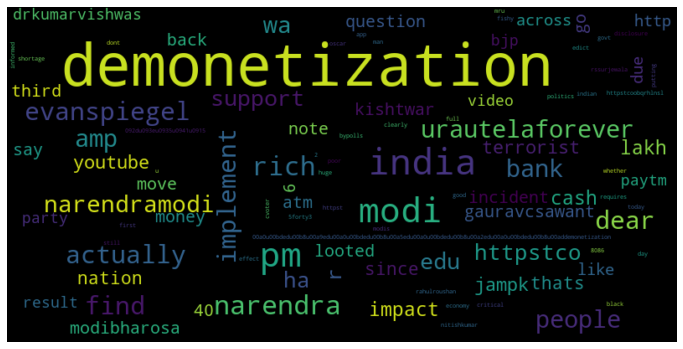

In [48]:
# forming word cloud of the data
from wordcloud import WordCloud
#WordCloud
wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### In in the above word cloud we can see that demonetization is the most occuring word, followed by india, modi, pm, and narendra 

In [19]:
# importing library
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Swapnil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Swapnil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Swapnil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# finding emotions from the tweets using text2emotion
sentiment = ['']*len(df.index)
for i in df.index:
    sentiment[i] = te.get_emotion(df['text'][i])

In [22]:
# adding emotions to the dataframe
df['emotion']=sentiment
df.head()

,text,TL_text,TL_text_new,emotion
0,rt rssurjewala critical question was paytm inf...,"[rssurjewala, critical, question, wa, paytm, i...","[rssurjewala, critical, question, wa, paytm, i...","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
1,rt hemant_80 did you vote on demonetization on...,"[hemant, _80, vote, demonetization, modi, surv...","[hemant, _80, vote, demonetization, modi, surv...","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
2,rt roshankar former finsec rbi dy governor cbd...,"[roshankar, former, finsec, rbi, dy, governor,...","[roshankar, former, finsec, rbi, dy, governor,...","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
3,rt ani_news gurugram haryana post office emplo...,"[ani_news, gurugram, haryana, post, office, em...","[ani_news, gurugram, haryana, post, office, em...","{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
4,rt satishacharya reddy wedding mail_today cart...,"[satishacharya, reddy, wedding, mail_today, ca...","[satishacharya, reddy, wedding, mail_today, ca...","{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."


In [23]:
# creating seperate column for all the emotions
Happy = []
Angry = []
Surprise = []
Sad = []
Fear = []
for i in range(df.shape[0]):
    res = df['emotion'][i]
    Happy.append(res['Happy'])
    Angry.append(res['Angry'])    
    Surprise.append(res['Surprise'])    
    Sad.append(res['Sad'])    
    Fear.append(res['Fear'])

In [24]:
# creating seperate column for all the emotions
df['Happy'] = Happy
df['Angry'] = Angry
df['Surprise'] = Surprise
df['Sad'] = Sad
df['Fear'] = Fear

In [25]:
# placing 1 where ever the emotion value is present
for i in range(df.shape[0]):
    if df['Happy'][i]!=0.00:
        df['Happy'][i] = 1
    else:
        df['Happy'][i] = 0
    if df['Angry'][i]!=0.00:
        df['Angry'][i] = 1
    if df['Surprise'][i]!=0.00:
        df['Surprise'][i]=1
    if df['Sad'][i]!=0.00:
        df['Sad'][i] = 1
    if df['Fear'][i]!=0.00:
        df['Fear'][i]=1

<ipython-input-25-89c89d2ae75c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Happy'][i] = 0
<ipython-input-25-89c89d2ae75c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fear'][i]=1
<ipython-input-25-89c89d2ae75c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Happy'][i] = 1
<ipython-input-25-89c89d2ae75c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

In [26]:
# extracting 76 features from the tweets
vectorizer = TfidfVectorizer(min_df= 500, sublinear_tf=True, norm='l2', ngram_range=(1,1))
final_features = vectorizer.fit_transform(df['text'].values.astype('U')).toarray()
final_features.shape

(14940, 76)

In [27]:
# performing train test split
y = df[['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']]
X_train, X_test, y_train, y_test = train_test_split(final_features, y, test_size=0.2)

In [28]:
# applying decision tree on the dataset
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
# analysing the results
print(classification_report(y_test, model.predict(X_test)))
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71       379
           1       0.83      0.81      0.82       331
           2       0.85      0.85      0.85      1070
           3       0.83      0.78      0.81       815
           4       0.91      0.91      0.91      1865

   micro avg       0.87      0.84      0.85      4460
   macro avg       0.84      0.80      0.82      4460
weighted avg       0.86      0.84      0.85      4460
 samples avg       0.75      0.75      0.74      4460

0.7653949129852744
0.9564926372155288


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# applying random forest on the dataset
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# analysing the results
print(classification_report(y_test, model.predict(X_test)))
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      0.59      0.74       379
           1       0.97      0.80      0.88       331
           2       0.94      0.81      0.87      1070
           3       0.94      0.74      0.83       815
           4       0.90      0.94      0.92      1865

   micro avg       0.93      0.83      0.88      4460
   macro avg       0.94      0.78      0.85      4460
weighted avg       0.93      0.83      0.87      4460
 samples avg       0.77      0.74      0.75      4460

0.7921686746987951
0.9565763052208835


### In the above results we can see that random forest has outperformed decision tree, giving an accuracy of 79.22%.

In [32]:
# importing libraries
from nltk.sentiment import SentimentIntensityAnalyzer

In [33]:
# Creating SentimentIntensityAnalyzer object
sia=SentimentIntensityAnalyzer()

In [34]:
# sentiment intensity for each tweet is calculated
df['Sentiment']=df['text'].apply(lambda text:sia.polarity_scores(str(text)))
df = pd.concat([df, df.Sentiment.dropna().apply(pd.Series)], axis=1)
df.head()

,text,TL_text,TL_text_new,emotion,Happy,Angry,Surprise,Sad,Fear,Sentiment,neg,neu,pos,compound
0,rt rssurjewala critical question was paytm inf...,"[rssurjewala, critical, question, wa, paytm, i...","[rssurjewala, critical, question, wa, paytm, i...","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.0,0.0,1.0,"{'neg': 0.1, 'neu': 0.783, 'pos': 0.117, 'comp...",0.1,0.783,0.117,0.1027
1,rt hemant_80 did you vote on demonetization on...,"[hemant, _80, vote, demonetization, modi, surv...","[hemant, _80, vote, demonetization, modi, surv...","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.0,0.0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000
2,rt roshankar former finsec rbi dy governor cbd...,"[roshankar, former, finsec, rbi, dy, governor,...","[roshankar, former, finsec, rbi, dy, governor,...","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.0,0.0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000
3,rt ani_news gurugram haryana post office emplo...,"[ani_news, gurugram, haryana, post, office, em...","[ani_news, gurugram, haryana, post, office, em...","{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0.0,0.0,0.0,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000
4,rt satishacharya reddy wedding mail_today cart...,"[satishacharya, reddy, wedding, mail_today, ca...","[satishacharya, reddy, wedding, mail_today, ca...","{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0.0,0.0,0.0,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000


In [35]:
# function for converting to whole number
def out(x):
    if(x>0):
        return 1
    elif(x<0):
        return -1
    else:
        return 0

In [36]:
# getting the whole numbers for sentiments
df['neg1']=df['neg'].apply(out)
df['neu1']=df['neu'].apply(out)
df['pos1']=df['pos'].apply(out)
df.head()

,text,TL_text,TL_text_new,emotion,Happy,Angry,Surprise,Sad,Fear,Sentiment,neg,neu,pos,compound,neg1,neu1,pos1
0,rt rssurjewala critical question was paytm inf...,"[rssurjewala, critical, question, wa, paytm, i...","[rssurjewala, critical, question, wa, paytm, i...","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.0,0.0,1.0,"{'neg': 0.1, 'neu': 0.783, 'pos': 0.117, 'comp...",0.1,0.783,0.117,0.1027,1,1,1
1,rt hemant_80 did you vote on demonetization on...,"[hemant, _80, vote, demonetization, modi, surv...","[hemant, _80, vote, demonetization, modi, surv...","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.0,0.0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,0,1,0
2,rt roshankar former finsec rbi dy governor cbd...,"[roshankar, former, finsec, rbi, dy, governor,...","[roshankar, former, finsec, rbi, dy, governor,...","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.0,0.0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,0,1,0
3,rt ani_news gurugram haryana post office emplo...,"[ani_news, gurugram, haryana, post, office, em...","[ani_news, gurugram, haryana, post, office, em...","{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0.0,0.0,0.0,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,0,1,0
4,rt satishacharya reddy wedding mail_today cart...,"[satishacharya, reddy, wedding, mail_today, ca...","[satishacharya, reddy, wedding, mail_today, ca...","{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0.0,0.0,0.0,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,0,1,0


In [37]:
# assigning labels
y = df[['neg1', 'neu1', 'pos1']]
y = np.array(y)
y

array([[1, 1, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int64)

In [38]:
# splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(final_features, y, test_size=0.2)

In [39]:
# applying decision tree on the sentiment data
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
# viewing results
print(classification_report(y_test, model.predict(x_test)))
print(model.score(x_test,y_test))
print(model.score(x_train,y_train))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1061
           1       1.00      1.00      1.00      2988
           2       0.90      0.88      0.89      1588

   micro avg       0.95      0.93      0.94      5637
   macro avg       0.92      0.90      0.91      5637
weighted avg       0.95      0.93      0.94      5637
 samples avg       0.96      0.95      0.94      5637

0.8263052208835341
0.9679551539491299


In [41]:
# applying random forest to the data
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
#viewing results
print(classification_report(y_test, model.predict(x_test)))
print(model.score(x_test,y_test))
print(model.score(x_train,y_train))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1061
           1       1.00      1.00      1.00      2988
           2       0.92      0.88      0.90      1588

   micro avg       0.96      0.94      0.95      5637
   macro avg       0.94      0.90      0.92      5637
weighted avg       0.96      0.94      0.95      5637
 samples avg       0.97      0.95      0.95      5637

0.8440428380187416
0.9681224899598394


### In the above results we can see that random forest has outperformed decision tree, giving an accuracy of 84.40%. If these results are compared with the results of emotion classification, sentiment classification gives better results. 

In [43]:
# finding the sum of each sentiment
negsum=np.sum(df.neg)
possum=np.sum(df.pos)
neusum=np.sum(df.neu)

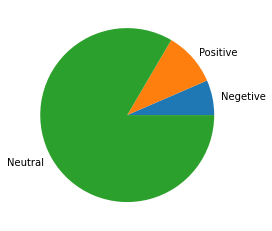

In [44]:
# creating a pie chart of sentiment
plt.figure()
arr=np.array([negsum,possum,neusum])
mylabels=['Negetive','Positive','Neutral']
plt.pie(arr,labels=mylabels)
plt.show()

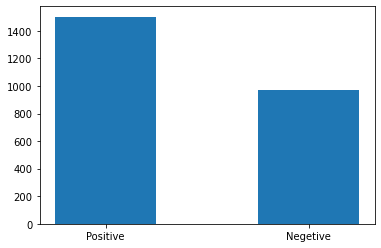

In [45]:
plt.figure()
ar=np.array([possum,negsum])
plt.bar(x=['Positive','Negetive'],height=ar,width=0.5,align='center')
plt.show()

## Based on the pie chart and bar graph we can say that people had a positive sentiment towards the decision taken by the GoI

In [46]:
# finding the sum of each emotion
happysum=np.sum(df.Happy)
sadsum=np.sum(df.Sad)
fearsum=np.sum(df.Fear)
angrysum=np.sum(df.Angry)
surprisesum=np.sum(df.Surprise)

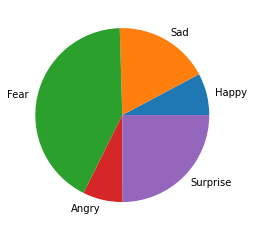

In [47]:
# creating a pie chart of emotion
plt.figure()
arr=np.array([happysum,sadsum,fearsum,angrysum,surprisesum])
mylabels=['Happy','Sad','Fear','Angry','Surprise']
plt.pie(arr,labels=mylabels)
plt.show()

### In emotion analysis we can see that the most prominet emtion is fear, as citizen were anticipating a lot of circumstances which could follow demonetization, the next most prominet emotion was surprise, indicating that people were taken by surprise by the steps taken by the Govenment of India. As seen, sad is also prominent in the pie chart.